<a href="https://colab.research.google.com/github/adilsonalbino/datascience/blob/main/analise_de_dados_acoes_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de desempenho de ações dos bancos Itau, Bradesco e Banco do Brasil


#### Neste notebook, irei  buscar entender qual foi o desempenho das ações dos bancos Itau, Bradesco e Banco do Brasil no ano de 2023, os dados serão coletados da API do yahoo finance, considerado por muitos da comunidade de DS como uma fonte segura para coleta.

#### Criado Por: Adison Albino Pereira

# Importando bibliotecas

In [ ]:
!pip install plotly_express
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 798.7 kB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import datetime
import plotly_express as px
import mplfinance as mpf

# Análise exploratória/reconhecimento dos dados

# Colentando dados da ação desejada

In [ ]:
# Defina as datas de início e fim
start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime(2023, 12, 31)

In [ ]:
# Fazendo download do histórico de ações de 2023
df_itau = yf.download('ITUB4.SA', start=start_date, end=end_date)
df_bb = yf.download('BBAS3.SA', start=start_date, end=end_date)
df_brad = yf.download('BBDC4.SA', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


#Adicionando coluna de código da ação nos dataframes


In [ ]:
df_itau['codigo'] = 'ITUB4.SA'
df_bb['codigo'] = 'BBAS3.SA'
df_brad['codigo'] = 'BBDC4.SA'

# Unindo os dados dos 3 dataframes, vamos usar o comando "concat" do pandas.

In [ ]:
df_geral = pd.concat([df_itau, df_bb, df_brad])

#Removendo coluna "Adj Close", pois não será utilizada na análise
df_geral = df_geral.drop(columns=['Adj Close'])

#Adicionando a coluna "variacao_dia"
df_geral['variacao_dia'] = df_geral['Close'] - df_geral['Open']

#Adicionando a coluna "nm_banco" Contendo os nomes dos bancos para facilitar a identificação
df_geral['nm_banco'] = df_geral['codigo'].apply(lambda x: 'ITAU' if x == 'ITUB4.SA' else ('BRADESCO' if x == 'BBDC4.SA' else 'BANCO DO BRASIL'))

#Adicionando uma nova coluna 'resultado' para facilitar a leitura se o preço desceu ou subiu
df_geral['resultado'] = df_geral['variacao_dia'].apply(lambda x: 'SUBIU' if x > 0 else 'DESCEU' if x < 0 else 'ESTAVEL')

#Resetando o index para liberar o campo date.
df_geral = df_geral.reset_index()

#Alterando os nomes das colunas
df_geral = df_geral.rename(columns={'Date': 'data','Open':'abertura', 'High':'maxima', 'Low' : 'minima', 'Close':'fechamento', 'Volume':'volume'})

#Arredondando as casas decimais
pd.options.display.float_format = '{:.2f}'.format

#Alterando o tipo da coluna "data" para date
df_geral['data'] = pd.to_datetime(df_geral['data']).dt.date
df_geral

,data,abertura,maxima,minima,fechamento,volume,codigo,variacao_dia,nm_banco,resultado
0,2023-01-02,24.43,24.53,24.04,24.49,23340700,ITUB4.SA,0.06,ITAU,SUBIU
1,2023-01-03,24.49,24.65,23.83,23.98,29873800,ITUB4.SA,-0.51,ITAU,DESCEU
2,2023-01-04,24.06,24.52,23.88,24.05,29881500,ITUB4.SA,-0.01,ITAU,DESCEU
3,2023-01-05,24.10,24.91,24.02,24.80,36322800,ITUB4.SA,0.70,ITAU,SUBIU
4,2023-01-06,24.93,25.31,24.80,25.23,37628200,ITUB4.SA,0.30,ITAU,SUBIU
...,...,...,...,...,...,...,...,...,...,...
739,2023-12-21,17.42,17.48,17.15,17.27,30227000,BBDC4.SA,-0.15,BRADESCO,DESCEU
740,2023-12-22,16.72,16.92,16.54,16.83,36672400,BBDC4.SA,0.11,BRADESCO,SUBIU
741,2023-12-26,16.83,16.93,16.80,16.88,13390200,BBDC4.SA,0.05,BRADESCO,SUBIU
742,2023-12-27,16.85,17.06,16.74,16.98,17838700,BBDC4.SA,0.13,BRADESCO,SUBIU


In [ ]:
df_geral.volume.info()

<class 'pandas.core.series.Series'>
RangeIndex: 744 entries, 0 to 743
Series name: volume
Non-Null Count  Dtype
--------------  -----
744 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


# Análise estatistica dos dados coletados

In [ ]:
df_geral.describe()

,abertura,maxima,minima,fechamento,volume,variacao_dia
count,744.00,744.00,744.00,744.00,744.00,744.00
mean,21.68,21.93,21.44,21.69,32422067.20,0.01
std,5.51,5.54,5.47,5.51,20888977.24,0.30
min,12.68,12.83,12.39,12.57,0.00,-0.83
25%,16.23,16.38,16.00,16.16,20256200.00,-0.17
50%,23.50,23.77,23.28,23.43,27402950.00,0.01
75%,26.39,26.72,26.20,26.43,38348750.00,0.19
max,33.88,33.97,33.74,33.97,237891100.00,1.33


In [ ]:
maior = df_geral['variacao_dia'].max()
menor = df_geral['variacao_dia'].min()
media = df_geral['variacao_dia'].mean()
media_subiu = df_geral[df_geral['resultado'] == 'SUBIU']['variacao_dia'].mean()
media_desceu = df_geral[df_geral['resultado'] == 'DESCEU']['variacao_dia'].mean()


#Imprimindo so resultados
print(f"Maior variação\tR$ {maior:,.2f}")
print(f"Menor variação\tR$ {menor:,.2f}")
print(f"Média variação\tR$ {media:,.2f}")
print(f"Média do que subiu\tR$ {media_subiu:,.2f}")
print(f"Média do que desceu\tR$ {media_desceu:,.2f}")

Maior variação	R$ 1.33
Menor variação	R$ -0.83
Média variação	R$ 0.01
Média do que subiu	R$ 0.24
Média do que desceu	R$ -0.23


####Análise:
#####Ao verificar a estatistica geral do nosso conjunto de dados podemos verificar algumas informações interessantes como por exemplo: média, desvio padrão, valor menor(-1.57) e maior(2.66), os quartis, de cada coluna do nosso dataframe.



#Extraindo insights dos dados

###Qual banco teve a ação com Maior variação?

In [ ]:
    df_geral.max().to_frame()

,0
data,2023-12-28
abertura,33.88
maxima,33.97
minima,33.74
fechamento,33.97
volume,237891100
codigo,ITUB4.SA
variacao_dia,1.33
nm_banco,ITAU
resultado,SUBIU


###Qual banco teve a ação com Menor variação?



In [ ]:
    df_geral.min().to_frame()

,0
data,2023-01-02
abertura,12.68
maxima,12.83
minima,12.39
fechamento,12.57
volume,0
codigo,BBAS3.SA
variacao_dia,-0.83
nm_banco,BANCO DO BRASIL
resultado,DESCEU


###Qual a soma total de variação por banco?

In [ ]:
df_analise_banco = df_geral.groupby('nm_banco')['variacao_dia'].sum().to_frame().reset_index()
df_analise_banco

,nm_banco,variacao_dia
0,BANCO DO BRASIL,4.01
1,BRADESCO,2.08
2,ITAU,4.75


###Qual é a soma da variação das ações que subiram e as que desceu?

In [ ]:
df_analise_soma = df_geral.groupby('resultado')['variacao_dia'].sum().to_frame().reset_index()
df_analise_soma

,resultado,variacao_dia
0,DESCEU,-80.60
1,ESTAVEL,0.00
2,SUBIU,91.44


###Gerando gráficos para visualização dos dados

In [ ]:
fig = px.bar(df_analise_banco, x='nm_banco', y='variacao_dia', title='Fechamento por dia')
fig.show()

Representação grafica da movimentação de preços da ação do BRADESCO

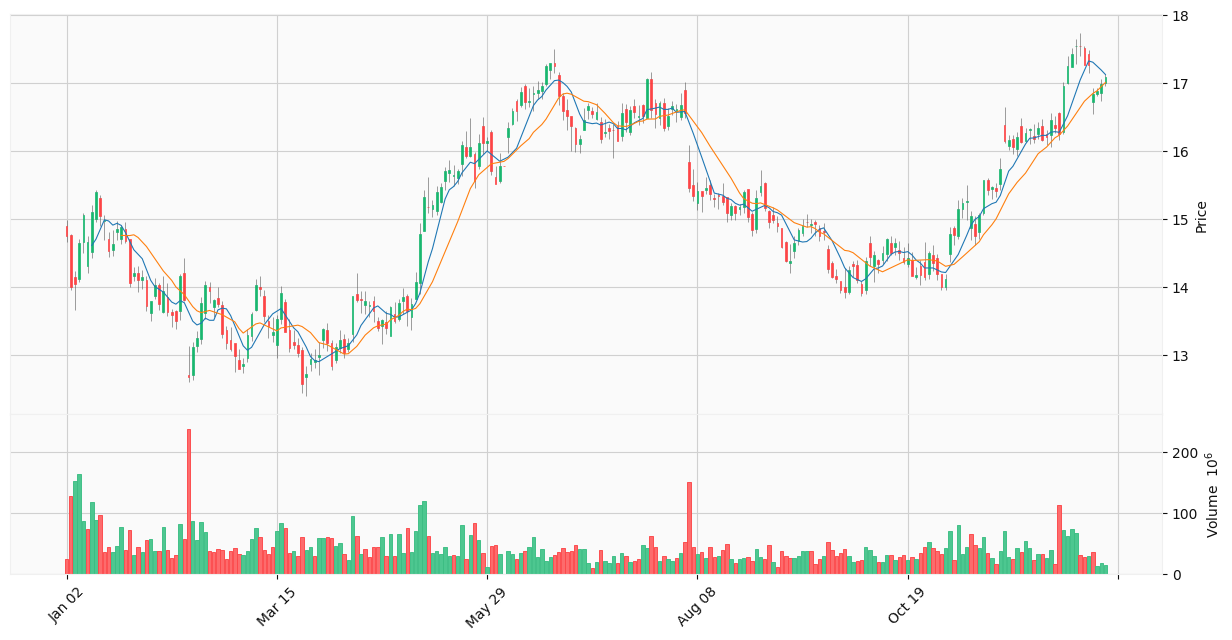

In [ ]:
mpf.plot(+, type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')

In [ ]:
#import plotly.graph_objects as go

#fig = go.Figure(data=[go.Candlestick(x=df_itau.index,
  #              open=df_itau['Open'],
   #             high=df_itau['High'],
    #            low=df_itau['Low'],
     #           close=df_itau['Close'])])

#fig.show()